In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame({'solds':[12327,17129,19923],"city":["New York","LA", "San Francisco"]})

In [10]:
df.head()

,solds,city
0,12327,New York
1,17129,LA
2,19923,San Francisco


In [11]:
df = df.sort_values('solds',ascending=False)

In [12]:
df['prob'] = df['solds'].cumsum()
df['prob'] = (df['prob']/df['solds'].sum())*100

(0.0, 100.0)

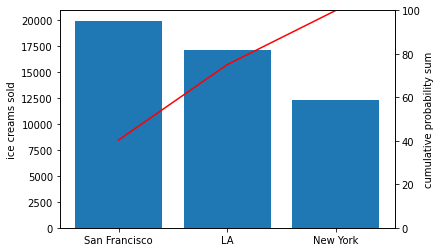

In [13]:
fig,ax1 =plt.subplots()
ax1.bar(x=df['city'],height=df['solds'])
ax1.set_ylabel('ice creams sold')
ax2 = ax1.twinx()
ax2.set_ylabel('cumulative probability sum')
ax2.plot(df['city'],df['prob'],c='red')
ax2.set_ylim(0,100)
#df.plot.bar(x='city',y='solds')

In [ ]:
You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.


In [15]:
data = [8,30,30,54,86,94,102,110,169,170,176,236,240,241,242,255,262,276,279,282]

(array([3., 3., 2., 3., 1., 8.]),
 array([  8.        ,  53.66666667,  99.33333333, 145.        ,
        190.66666667, 236.33333333, 282.        ]),
 <BarContainer object of 6 artists>)

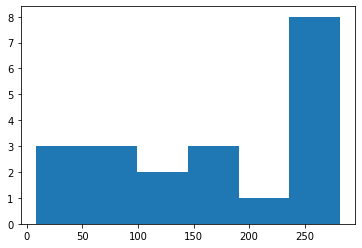

In [17]:
plt.hist(x=data,bins=6)

In [23]:
freq_table = pd.DataFrame()

In [26]:
number_of_bins=6
bin_range = (max(data)-min(data))/number_of_bins

In [33]:
inits = []
ends = []
for i in range(min(data),max(data),round(bin_range)):
    print(i, i+round(bin_range))
    inits.append(i)
    ends.append(i+round(bin_range))

8 54
54 100
100 146
146 192
192 238
238 284


In [34]:
df = pd.DataFrame({'init':inits,'end':ends})

In [36]:
df['freq'] = [0]*len(df)

In [40]:
for i in data:
    df[(df.init <= i) & (df.end > i)] +=1

In [43]:
count = df['freq'].sum()

In [45]:
df['relative_freq'] =  round(100*(df['freq']/count),2)

In [46]:
df

,init,end,freq,relative_freq
0,12,58,4,18.18
1,58,104,4,18.18
2,102,148,2,9.09
3,149,195,3,13.64
4,193,239,1,4.55
5,246,292,8,36.36


Text(0, 0.5, 'histogram of relative frequency')

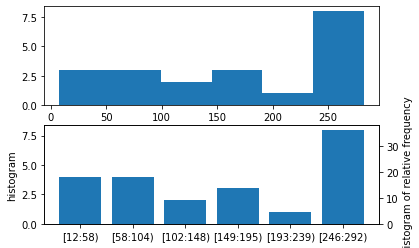

In [64]:
fig, axs = plt.subplots(2)
axs[0].hist(data,bins=6)


axs[1].bar(['['+str(init)+':'+str(end)+')'for init,end in zip(df['init'],df['end'])],df['freq'])
axs[1].set_ylabel('histogram')
ax2 = axs[1].twinx()
ax2.bar(['['+str(init)+':'+str(end)+')'for init,end in zip(df['init'],df['end'])],df['relative_freq'])
ax2.set_ylabel('histogram of relative frequency')
#plt.hist(x=data,bins=6,ax=)
